# Machine Learning Engineer Nanodegree

## Capstone Project: Predicting Medical Insurance Costs



## Introduction
Supervised learning problems can be further grouped into 
- Regression problems and 
- Classification problems

In classification, learning algorithms takes the input data and map the output to a discrete output like True or False
In regression, learning algorithms maps the input data to continuous output like weight, cost, etc.

In this project I will apply regression techniques of supervised learning to predict the medical insurance costs. 
Kaggle is a platform for machine learning and data science. Kaggle provides a number of open data sets catering to various domains. 

I am using the dataset from Kaggle. 
This particular dataset has been downloaded from https://www.kaggle.com/mirichoi0218/insurance/data.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')
data = data.dropna()
print data.info()
print data.head(5)
print ('-'*90)
print "Successfully imported Insurance data. Data has {} data points with {} variables each.".format(*data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
------------------------------------------------------------------------------------------
Successfully imported Insurance data. Data has 1338 data points with 7 variables each.


## Data Exploration
Dataset consists of 1338 records. Each record contains the below data for specific person.
- age – Age of the person
- sex – Sex of the person
- bmi – Body Mass Index(BMI) of the person
- children – Number of children for the person
- smoker – Smoking status of the person
- region – Region of the person in US
- charges – Medical Insurance costs per year for the person


In [50]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age/10]
    
data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")

for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    
by_age = data.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_sex = data.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = data.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)

by_region = data.groupby(by='region').size()
print (by_region)
print ('-'*80)

by_children = data.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = data.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
female    662
male      676
dtype: int64
--------------------------------------------------------------------------------
smoker
no     1064
yes     274
dtype: int64
--------------------------------------------------------------------------------
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
--------------------------------------------------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


To understand correlation between the input or the independent variables, I classified the ages and BMI into specific categories. 
The above analysis shows the stats like number of male and female, smokers and non-smokers, etc. from the input data.  
Taking the BMI ranges from Medline Plus, I categorized the input samples into `below-weight`, `normal-weight`, `over-weight` and `obese`.

From the above data we can observe below
- Input data contains an even distribution of male and female samples
- Majority of them are non-smokers with 1064 samples
- Majority of the samples are in age groups 20-29 and 40- 49 with the numbers 280 and 279 respectively.
- A major sample of input data contains persons with no children with 574.
- The data is evenly distributed across 4 regions with the region of `southeast` having slightly more samples.
- Majority the sample fall under the category of `obese`

Data distribution analysys


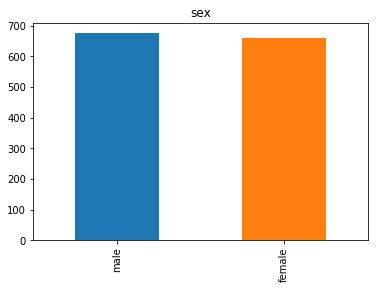

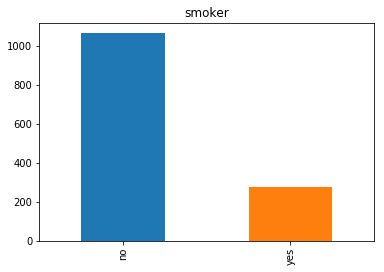

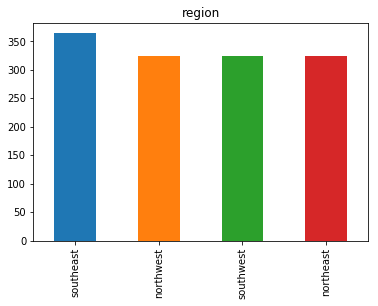

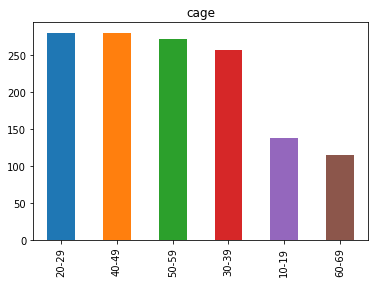

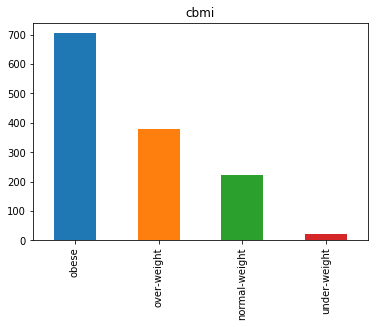

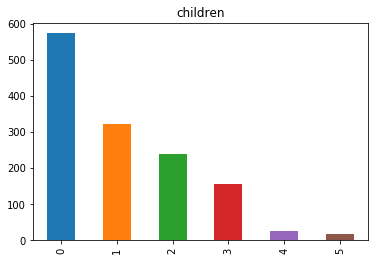

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['sex','smoker','region','cage','cbmi','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


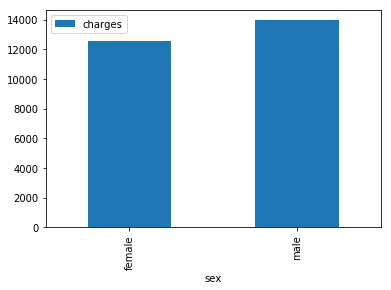

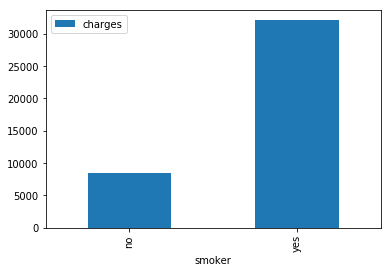

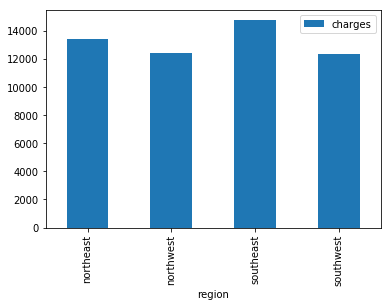

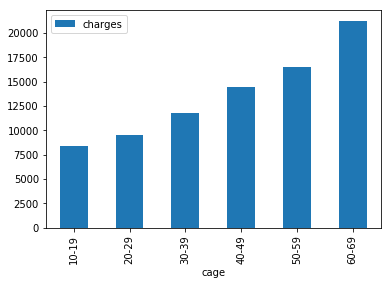

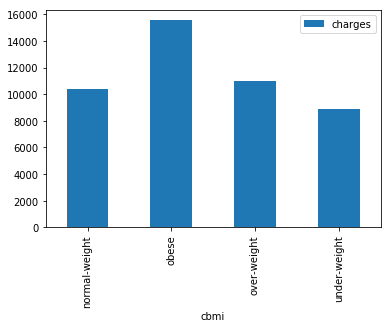

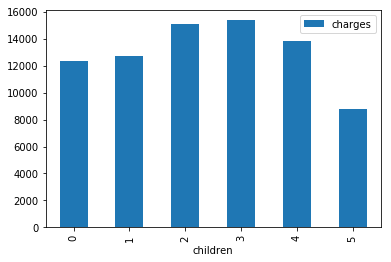

In [52]:
print('Mean cost analysys:')
for v in variables:
    group_df = data.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

From the above bar graphs, we can deduce the below facts.
- Insurance costs are higher among male population
- Insurance costs are highest among the population of age groups 60-69.
- Insurance costs increases among the smokers
- Insurance costs increases among the obese population
- Insurance costs are higher among the population in southwest region
- Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children.


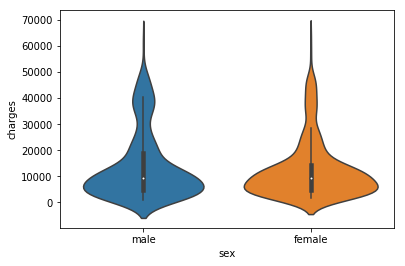

In [22]:
sns.violinplot(x='sex', y='charges',data=data)

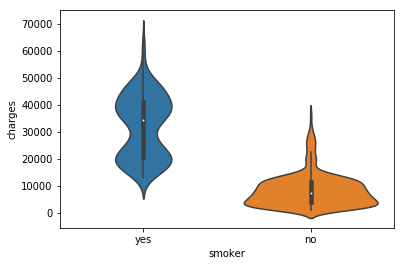

In [23]:
sns.violinplot(x='smoker', y='charges',data=data)

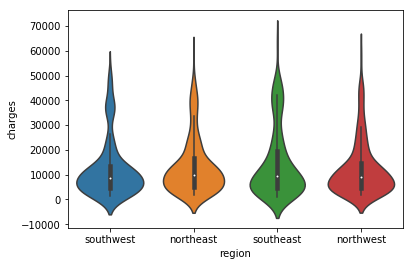

In [24]:
sns.violinplot(x='region', y='charges',data=data)

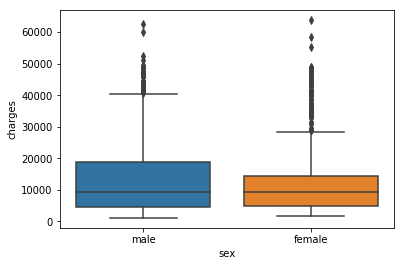

In [25]:
sns.boxplot(x='sex', y='charges',data=data)

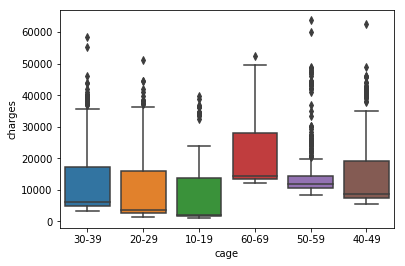

In [26]:
sns.boxplot(x='cage', y='charges',data=data)

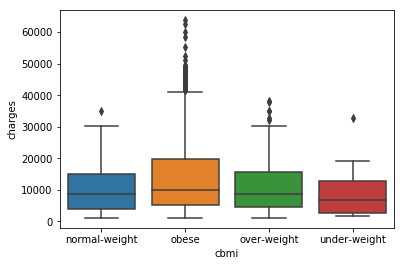

In [27]:
sns.boxplot(x='cbmi', y='charges',data=data)

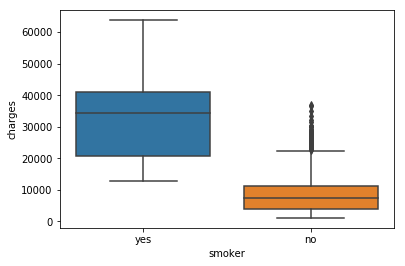

In [28]:
sns.boxplot(x='smoker', y='charges',data=data)

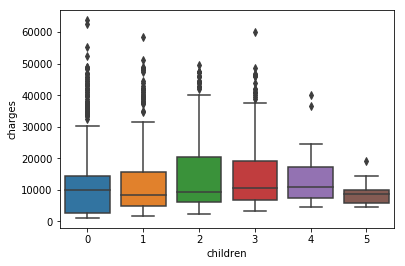

In [29]:
sns.boxplot(x='children', y='charges',data=data)

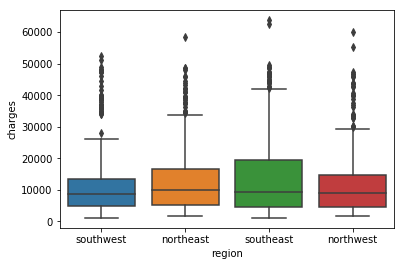

In [30]:
sns.boxplot(x='region', y='charges',data=data)

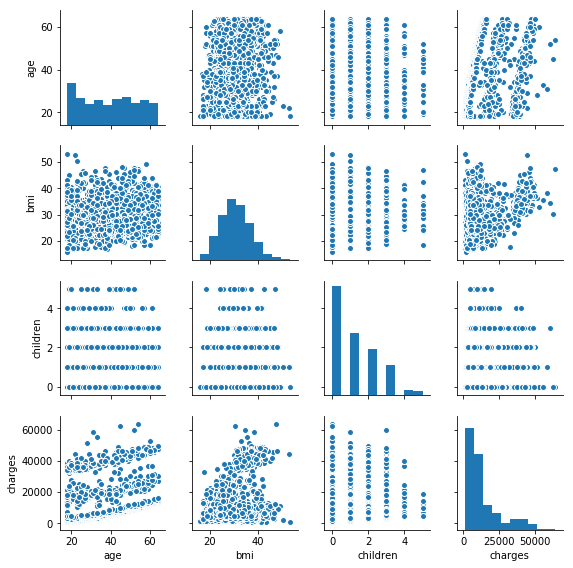

In [31]:
sns.pairplot(data, size=2)

### Implementation: Calculate Statistics
I explored the descriptive statistics about the insurance costs.

In [32]:
target = data['charges']
features = data.drop(['age', 'bmi', 'charges'], axis=1)
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
median_cost = np.median(target)
std_cost = np.std(target)

print target.describe()
print ('-'*90)
# calculated statistics
print "Statistics for Medical Insurance dataset:\n"
print "Minimum insurance cost: ${:,.2f}".format(min_cost)
print "Maximum insurance acost: ${:,.2f}".format(max_cost)
print "Mean insurance cost: ${:,.2f}".format(mean_cost)
print "Median insurance cost ${:,.2f}".format(median_cost)
print "Standard deviation of insurance costs: ${:,.2f}".format(std_cost)

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
------------------------------------------------------------------------------------------
Statistics for Medical Insurance dataset:

Minimum insurance cost: $1,121.87
Maximum insurance acost: $63,770.43
Mean insurance cost: $13,270.42
Median insurance cost $9,382.03
Standard deviation of insurance costs: $12,105.48


In [33]:
output = pd.DataFrame(index=features.index)

for col, col_data in features.iteritems():
    if object == col_data.dtype:
        col_data = col_data.replace(['yes', 'no'], [1, 0])
        
    if object == col_data.dtype:
        col_data = pd.get_dummies(col_data, prefix = col)
    output = output.join(col_data)

features = output
print "Processed feature columns ({} total features):\n{}".format(len(features.columns), list(features.columns))
#print features.head(5)

Processed feature columns (18 total features):
['sex_female', 'sex_male', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'cbmi_normal-weight', 'cbmi_obese', 'cbmi_over-weight', 'cbmi_under-weight', 'cage_10-19', 'cage_20-29', 'cage_30-39', 'cage_40-49', 'cage_50-59', 'cage_60-69']


----

## Developing a Model


### Implementation: Define a Performance Metric
I opted for below two metrics.
- Coefficient of determination
This metric is denoted by R^2 and also called are “R squared”. R-squared is a statistical measure of how close the data are to the fitted regression line. This metric calculates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- Explained variance score
While determining the dependent variable, first we need to understand how much variance is observed in it. This metric explains the fluctuation (or variance) of the dependent variable by using the independent variables. This measures how far a set of numbers are spread out from their mean value. Best possible score is 1.0, lower values are worse.

### Training and Testing

1. Splitting the data set into training and testing subsets helps to assess the performance of the model over an
   independent data set. Typlically, we train the model using training data subset and then evaluate the model's 
   performance using the testing data subset, which is independent of the training data subset.
   
2. Splitting the data set also helps in having a check on model's overfitting.   

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.20, 
                                                    random_state=0)
print "Training and testing split was successful."

Training and testing split was successful.


In [35]:
from time import time
from sklearn.metrics import r2_score, explained_variance_score
def train_predict_model(clf, X_train, y_train, X_test, y_test):
    ''' Fits a classifier to the training data. '''
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    print ('#'*50)
    # Start the clock, make predictions, then stop the clock
    print ("Predictions for training data:")
    start = time()
    y_pred = clf.predict(X_train)
    end = time()
    print "Made predictions for training data in {:.4f} seconds.".format(end - start)
    print ("R^2 score for training set: {:4f}".format(r2_score(y_train.values, y_pred)))
    print ("explained-variance score for training set: {:4f}".format(explained_variance_score(y_train.values, y_pred)))
    print ('#'*50)
    print ("Predictions for testing data:")
    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    print "Made predictions for testing data in {:.4f} seconds.".format(end - start)
    print ("R^2 score for testing set: {:4f}".format(r2_score(y_test.values, y_pred)))
    print ("explained-variance score for testing set: {:4f}".format(explained_variance_score(y_test.values, y_pred)))

As part of evaluation, I considered multiple regression algorithms like decision trees, Support Vector Machines for regression, etc. Based on the metrics, I choose to use decision tree technique for this project

The goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.


In [55]:
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

clf_a = DecisionTreeRegressor(random_state=1)
clf_b = SVR()
clf_c = KNeighborsRegressor()
clf_d = NuSVR()
for clf in (clf_a, clf_b, clf_c, clf_d):
    for size in (300, 600, 900):
        train_predict_model(clf, X_train[:size], y_train[:size], X_test, y_test)
        print('-'* 80)
    print ('+'*80)

Training a DecisionTreeRegressor using a training set size of 300. . .
Trained model in 0.0014 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0005 seconds.
R^2 score for training set: 0.969219
explained-variance score for training set: 0.969219
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0003 seconds.
R^2 score for testing set: 0.759738
explained-variance score for testing set: 0.759814
--------------------------------------------------------------------------------
Training a DecisionTreeRegressor using a training set size of 600. . .
Trained model in 0.0017 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0004 seconds.
R^2 score for training set: 0.955965
explained-variance score for training set: 0.955965
##########################################

Once after deciding the model, I used a random permutation cross-validator to split the features into multiple data-sets. 
I used grid-search technique to fit the model against various parameters of the DT algorithm like
- criterion: This parameter measures the quality of split with supported values of `mse`, `friedman_mse` and `mae`
- splitter: This parameter is used to choose the strategy of split at each node with values of `best` and `random`
- max_depth: This parameter defines the maximum depth of the decision tree. I used values from 1 thru 10.  

In [56]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer
def fit_model(X, y):
    rs = ShuffleSplit(n_splits=16, test_size=0.20, random_state=1)
    cv_sets = rs.split(X)
    reg = DecisionTreeRegressor(random_state=0)
    params = {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': range(1,11),
    }
    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(estimator=reg, 
                        param_grid=params, 
                        scoring=scoring_fnc,
                        cv=cv_sets)
    grid = grid.fit(features, target)
    return grid.best_estimator_

best_reg = fit_model(X_train, y_train)
print ('Model Parameters:')
print "Parameter 'criterion' is {} for the optimal model.".format(best_reg.get_params()['criterion'])
print "Parameter 'splitter' is {} for the optimal model.".format(best_reg.get_params()['splitter'])
print "Parameter 'max_depth' is {} for the optimal model.".format(best_reg.get_params()['max_depth'])
train_predict_model(best_reg, X_train, y_train, X_test, y_test)

Model Parameters:
Parameter 'criterion' is mae for the optimal model.
Parameter 'splitter' is best for the optimal model.
Parameter 'max_depth' is 6 for the optimal model.
Training a DecisionTreeRegressor using a training set size of 1070. . .
Trained model in 0.0677 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0005 seconds.
R^2 score for training set: 0.860868
explained-variance score for training set: 0.869400
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0003 seconds.
R^2 score for testing set: 0.849415
explained-variance score for testing set: 0.857397


In [57]:
client_data = [
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 ]
#0      19  female  27.900         0    yes  southwest  16884.92400
#1      18    male  33.770         1     no  southeast   1725.55230
#1313   19  female  34.700         2    yes  southwest  36397.57600
#1314   30  female  23.655         3    yes  northwest  18765.87545
#15     19    male  24.600         1     no  southwest   1837.23700
#29     31    male  36.300         2    yes  southwest  38711.00000

#'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
#      age  sex_female  sex_male    bmi  children  smoker  region_northeast  \
best_reg.predict(client_data)

array([17081.08   ,  2219.4451 , 36149.4835 , 19361.9988 ,  2219.4451 ,
       38728.67755])

As seen from the above results, selected DT model seems to be predicting the costs accurately at the higher end of the costs scale. 
From the above data, for records 1, 3, 4 and 6, the margin between the actual and predicted cost significantly less compared to the records 2 and 5. 
For records 2 and 5, the actual insurance cost is less than 2000 USD and the model predicted the values to be above 2000 USD. 
In case of other records, the actual insurance cost is more than 2000 USD and the model has predicted the values more accurately. 